In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import pylab as plt
import math
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#data import and wrangling
col_names = ['age', 
             'sex', 
             'chest_pain', 
             'resting_bp', 
             'cholesterol', 
             'high_blood_sugar', 
             'resting_ecg', 
             'max_heart_rate', 
             'angina', 
             'oldpeak', 
             'ST_slope', 
             'major_vessels', 
             'thalassemia', 
             'heart_disease']
raw_heart = pd.read_table("heart.dat", sep = " ", header = None, names = col_names)

In [40]:
raw_heart.head()

,age,sex,chest_pain,resting_bp,cholesterol,high_blood_sugar,resting_ecg,max_heart_rate,angina,oldpeak,ST_slope,major_vessels,thalassemia,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [38]:
#create a copy of the raw_data with descriptive variable levels
heart = raw_heart

heart.sex.replace({0.0: "Female", 1.0: "Male"}, inplace = True)
heart.chest_pain.replace({1.0: "Typical", 2.0: "Atypical", 3.0: "Non_Anginal", 4.0: "Asymptomatic"}, inplace = True)
heart.high_blood_sugar.replace({0.0: "False", 1.0: "True"}, inplace = True)
heart.resting_ecg.replace({0.0: "Normal", 1.0: "Abnormal", 2.0: "LV_Growth"}, inplace = True)
heart.angina.replace({0.0: "False", 1.0: "True"}, inplace = True)
heart.ST_slope.replace({1.0: "Downsloping", 2.0: "Flat", 3.0: "Upsloping"}, inplace = True)
heart.thalassemia.replace({6.0: "Normal", 3.0: "Fixed_Defect", 7.0: "Reversable_Defect"}, inplace = True)
heart.heart_disease.replace({1.0: "Absent", 2.0: "Present"}, inplace = True)

raw_heart = pd.read_table("heart.dat", sep = " ", header = None, names = col_names)

In [39]:
heart.head()

,age,sex,chest_pain,resting_bp,cholesterol,high_blood_sugar,resting_ecg,max_heart_rate,angina,oldpeak,ST_slope,major_vessels,thalassemia,heart_disease
0,70.0,Male,Asymptomatic,130.0,322.0,False,LV_Growth,109.0,False,2.4,Flat,3.0,Fixed_Defect,Present
1,67.0,Female,Non_Anginal,115.0,564.0,False,LV_Growth,160.0,False,1.6,Flat,0.0,Reversable_Defect,Absent
2,57.0,Male,Atypical,124.0,261.0,False,Normal,141.0,False,0.3,Downsloping,0.0,Reversable_Defect,Present
3,64.0,Male,Asymptomatic,128.0,263.0,False,Normal,105.0,True,0.2,Flat,1.0,Reversable_Defect,Absent
4,74.0,Female,Atypical,120.0,269.0,False,LV_Growth,121.0,True,0.2,Downsloping,1.0,Fixed_Defect,Absent


In [9]:
#visualisation (using descriptive dataset)
sns.set_style("whitegrid")

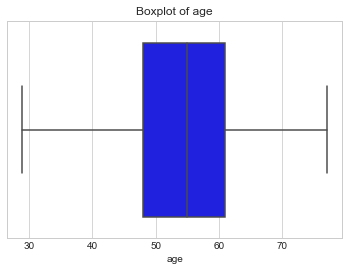

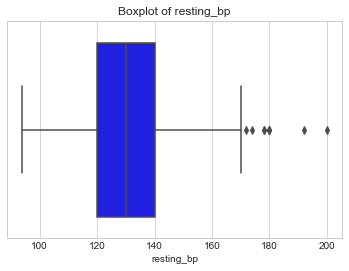

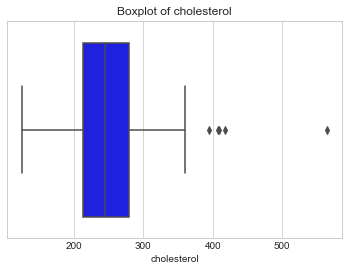

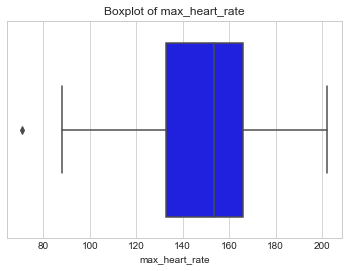

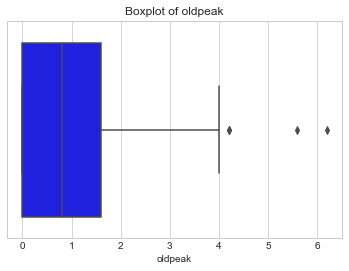

In [78]:
#univariate (numeric)
numeric_cols = ["age", "resting_bp", "cholesterol", "max_heart_rate", "oldpeak"]

for i in range(len(numeric_cols)):
    ax = sns.boxplot(x=numeric_cols[i], data=heart,color="blue")
    plot_title = str("Boxplot of " + numeric_cols[i])
    ax.set(title = plot_title)
    plt.show(ax)
    print(" ")

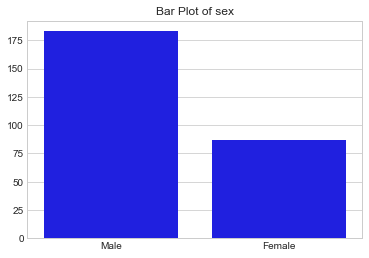

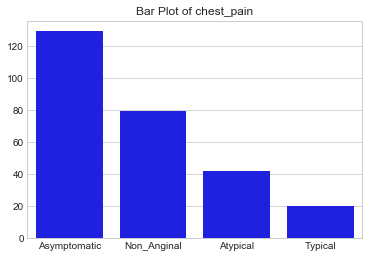

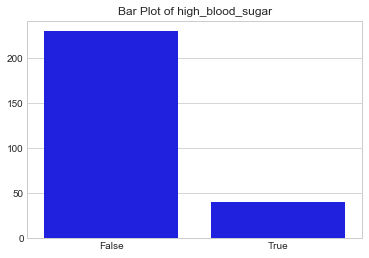

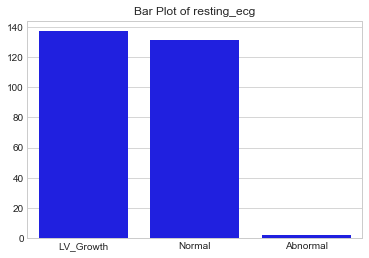

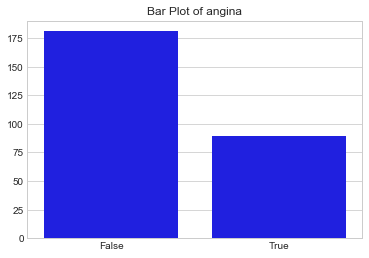

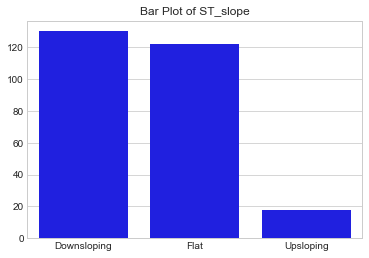

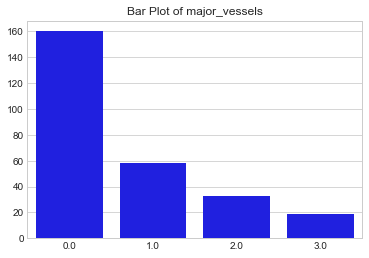

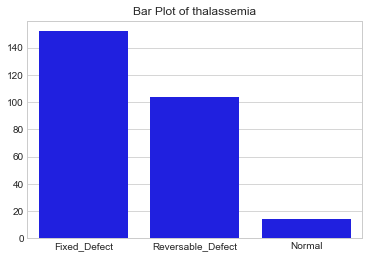

In [76]:
#univariate (categorical)
categorical_cols = ["sex", "chest_pain", "high_blood_sugar", "resting_ecg", "angina", "ST_slope",
                   "major_vessels", "thalassemia"]

for i in range(len(categorical_cols)):
    values = heart[categorical_cols[i]].value_counts().keys().tolist()
    counts = heart[categorical_cols[i]].value_counts().tolist()
    ax = sns.barplot(x= values, y=counts,color="blue")
    plot_title = str("Bar Plot of " + categorical_cols[i])
    ax.set(title = plot_title)
    plt.show(ax)
    print(" ")

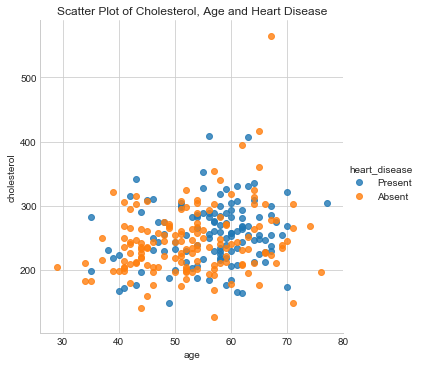

In [83]:
#multivariate
g = sns.lmplot(x="age", y="cholesterol", hue="heart_disease",
               truncate=True, size=5, fit_reg = False, data=heart)
plt.title("Scatter Plot of Cholesterol, Age and Heart Disease")
plt.show()

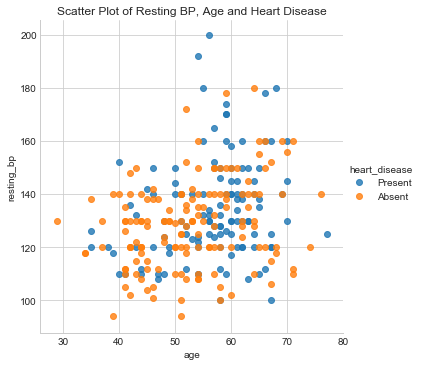

In [90]:
g = sns.lmplot(x="age", y="resting_bp", hue="heart_disease",
               truncate=True, size=5, fit_reg = False, data=heart)
plt.title("Scatter Plot of Resting BP, Age and Heart Disease")
plt.show()

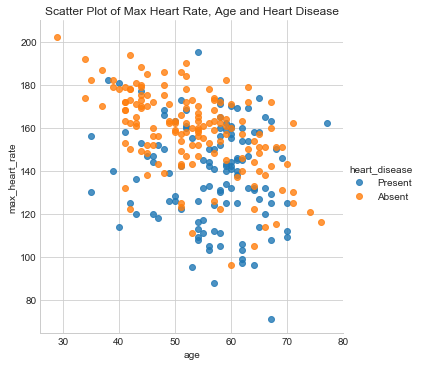

In [89]:
g = sns.lmplot(x="age", y="max_heart_rate", hue="heart_disease",
               truncate=True, size=5, fit_reg = False, data=heart)
plt.title("Scatter Plot of Max Heart Rate, Age and Heart Disease")
plt.show()

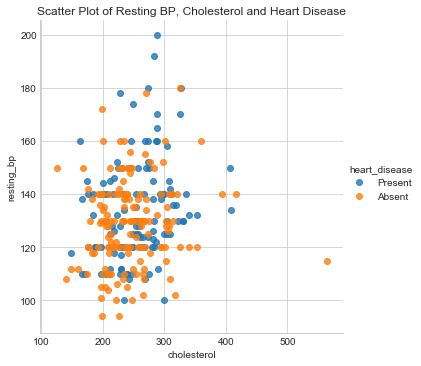

In [88]:
g = sns.lmplot(x="cholesterol", y="resting_bp", hue="heart_disease",
                 data=heart, fit_reg = False)

plt.title("Scatter Plot of Resting BP, Cholesterol and Heart Disease")
plt.show()

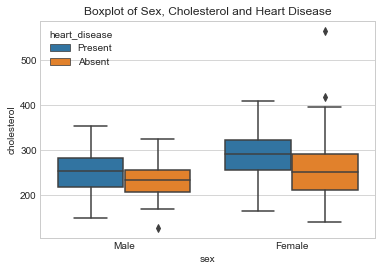

In [91]:
g = sns.boxplot(x="sex", y="cholesterol", hue="heart_disease",
                 data=heart)

plt.title("Boxplot of Sex, Cholesterol and Heart Disease")
plt.show()

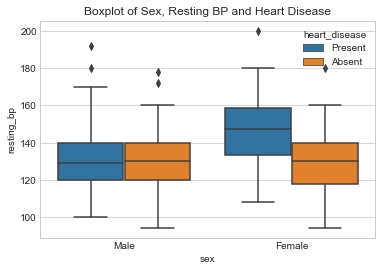

In [92]:
g = sns.boxplot(x="sex", y="resting_bp", hue="heart_disease",
                 data=heart)
plt.title("Boxplot of Sex, Resting BP and Heart Disease")
plt.show()

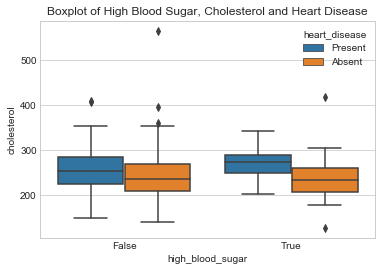

In [93]:
g = sns.boxplot(x="high_blood_sugar", y="cholesterol", hue="heart_disease",
                 data=heart)
plt.title("Boxplot of High Blood Sugar, Cholesterol and Heart Disease")
plt.show()

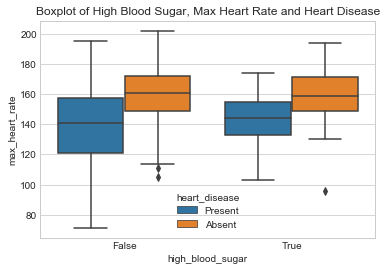

In [99]:
g = sns.boxplot(x="high_blood_sugar", y="max_heart_rate", hue="heart_disease",
                 data=heart)
plt.title("Boxplot of High Blood Sugar, Max Heart Rate and Heart Disease")
plt.show()

Text(0.5,1,u'Proportions of Thalassemia Levels within Heart Disease Present')

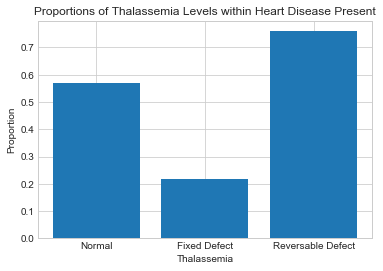

In [98]:
thal_counts = heart['thalassemia'].value_counts()

mask_normal=heart['thalassemia']=="Normal"
mask_fixed=heart['thalassemia']=="Fixed_Defect"
mask_rev=heart['thalassemia']=="Reversable_Defect"

norm_heart=heart.loc[mask_normal,"heart_disease"].value_counts()
fix_heart=heart.loc[mask_fixed,"heart_disease"].value_counts()
rev_heart=heart.loc[mask_rev,"heart_disease"].value_counts()

rate = [norm_heart["Present"]/float(thal_counts['Normal']),fix_heart["Present"]/float(thal_counts['Fixed_Defect']),rev_heart["Present"]/float(thal_counts['Reversable_Defect'])]

plt.bar(range(3),rate,align='center')
plt.xticks(range(3), ['Normal','Fixed Defect','Reversable Defect'])
plt.xlabel('Thalassemia')
plt.ylabel('Proportion')
plt.title('Proportions of Thalassemia Levels within Heart Disease Present')

Text(0.5,1,u'Proportions of Chest Pain Levels within Heart Disease Present')

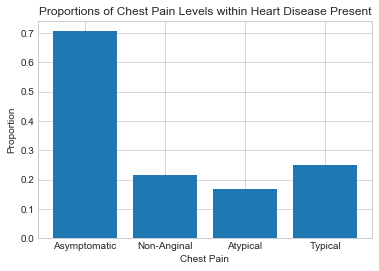

In [97]:
chest_counts = heart['chest_pain'].value_counts()

mask_aysmp=heart['chest_pain']=="Asymptomatic"
mask_nonang=heart['chest_pain']=="Non_Anginal"
mask_atyp=heart['chest_pain']=="Atypical"
mask_typ=heart['chest_pain']=="Typical"

asymp_heart=heart.loc[mask_aysmp,"heart_disease"].value_counts()
nonang_heart=heart.loc[mask_nonang,"heart_disease"].value_counts()
atyp_heart=heart.loc[mask_atyp,"heart_disease"].value_counts()
typ_heart=heart.loc[mask_typ,"heart_disease"].value_counts()

rate = [asymp_heart["Present"]/float(chest_counts['Asymptomatic']),
        nonang_heart["Present"]/float(chest_counts['Non_Anginal']),
        atyp_heart["Present"]/float(chest_counts['Atypical']),
       typ_heart["Present"]/float(chest_counts['Typical'])]

plt.bar(range(4),rate,align='center')
plt.xticks(range(4), ['Asymptomatic','Non-Anginal','Atypical','Typical'])
plt.xlabel('Chest Pain')
plt.ylabel('Proportion')
plt.title('Proportions of Chest Pain Levels within Heart Disease Present')

In [41]:
#modeling (using raw dataset)
raw_heart = raw_heart.as_matrix()
rheart_target = raw_heart[:,13]
rheart_desc = raw_heart[:,0:12]
x_train, x_test, y_train, y_test = train_test_split(rheart_desc,rheart_target,test_size=.25,random_state=1)

In [43]:
#knn, euclidean, k = 1
clf_knn_euc = KNeighborsClassifier(1)
clf_knn_euc.fit(x_train,y_train)
pred_knn_euc = clf_knn_euc.predict(x_test)
cm_knn_euc = confusion_matrix(y_test,pred_knn_euc)
print(cm_knn_euc)

[[22 14]
 [13 19]]


In [49]:
#parameter tuning
#knn, manhattan, k = 1
clf_knn_man = KNeighborsClassifier(1,p=1)
clf_knn_man.fit(x_train,y_train)
pred_knn_man = clf_knn_man.predict(x_test)
cm_knn_man = confusion_matrix(y_test,pred_knn_man)
print(cm_knn_man)

#manhattan has an additional misclassification so will use euclidean

(array([[22, 14],
       [14, 18]], dtype=int64), array([[22, 14],
       [13, 19]], dtype=int64))


In [50]:
#knn, euc, k = 3
clf_knn_3 = KNeighborsClassifier(3)
clf_knn_3.fit(x_train,y_train)
pred_knn_3 = clf_knn_3.predict(x_test)
cm_knn_3 = confusion_matrix(y_test,pred_knn_3)
print(cm_knn_3)

#better than k = 1

[[27  9]
 [11 21]]


In [51]:
#knn, euc, k = 5
clf_knn_5 = KNeighborsClassifier(5)
clf_knn_5.fit(x_train,y_train)
pred_knn_5 = clf_knn_5.predict(x_test)
cm_knn_5 = confusion_matrix(y_test,pred_knn_5)
print(cm_knn_5)

#no improvement from k = 3

[[27  9]
 [11 21]]


In [53]:
#knn, euc, weighted, k = n
clf_knn_weight = KNeighborsClassifier(math.trunc(len(raw_heart)*.75),weights = 'distance')
clf_knn_weight.fit(x_train,y_train)
pred_knn_weight = clf_knn_weight.predict(x_test)
cm_knn_weight = confusion_matrix(y_test,pred_knn_weight)
print(cm_knn_weight)

#over classifying heart diease = 1 with weighted (possibley due to imbalance of data)

[[35  1]
 [27  5]]


In [55]:
#knn, euc, weighted, k = 5
clf_knn_weight_5 = KNeighborsClassifier(5,weights = 'distance')
clf_knn_weight_5.fit(x_train,y_train)
pred_knn_weight_5 = clf_knn_weight_5.predict(x_test)
cm_knn_weight_5 = confusion_matrix(y_test,pred_knn_weight_5)
print(cm_knn_weight_5)

#better than before, but not as good as the unweighted model

[[26 10]
 [11 21]]


In [56]:
print classification_report(y_test,pred_knn_5)
#(1 = heart disease absent, 2 = heart disease present)

             precision    recall  f1-score   support

        1.0       0.71      0.75      0.73        36
        2.0       0.70      0.66      0.68        32

avg / total       0.71      0.71      0.71        68



In [57]:
#decision tree
clf_dt = DecisionTreeClassifier()
fit_dt = clf_dt.fit(x_train, y_train)
pred_dt = fit_dt.predict(x_test) 
confusion_matrix(y_test, pred_dt)

array([[29,  7],
       [ 8, 24]], dtype=int64)

In [58]:
#parameter tuning
#decision tree, max depth = 3
clf_dt_md3 = DecisionTreeClassifier(max_depth=3)
fit_dt_md3 = clf_dt_md3.fit(x_train, y_train)
pred_dt_md3 = fit_dt_md3.predict(x_test) 
confusion_matrix(y_test, pred_dt_md3)

#not as good as default model

array([[35,  1],
       [12, 20]], dtype=int64)

In [59]:
#decision tree, max features = auto
clf_dt_auto = DecisionTreeClassifier(max_features="auto")
fit_dt_auto = clf_dt_auto.fit(x_train, y_train)
pred_dt_auto = fit_dt_auto.predict(x_test) 
confusion_matrix(y_test, pred_dt_auto)

#also not as good as default

array([[23, 13],
       [ 7, 25]], dtype=int64)

In [60]:
print classification_report(y_test,pred_dt)
#(1 = heart disease absent, 2 = heart disease present)

             precision    recall  f1-score   support

        1.0       0.78      0.81      0.79        36
        2.0       0.77      0.75      0.76        32

avg / total       0.78      0.78      0.78        68



In [65]:
#naive bayes (extention)
gnb = GaussianNB()
pred_bayes = gnb.fit(x_train, y_train).predict(x_test)
confusion_matrix(y_test, pred_bayes)

array([[30,  6],
       [ 7, 25]], dtype=int64)

In [66]:
print classification_report(y_test,pred_bayes)

             precision    recall  f1-score   support

        1.0       0.81      0.83      0.82        36
        2.0       0.81      0.78      0.79        32

avg / total       0.81      0.81      0.81        68

